# Tasks

* What is the mean (total) pledge that projects get? (not per backer) *Your answer may vary by +/- 5%

    * $2,245
    
    * $6,750
    
    * $10,981
    
    * $4,980

* Create a histogram that shows the distribution for number of backers.

* What is the skew of the distribution? 

* Is the ‘duration’ variable normally distributed? 
    * Yes
    * No

* If you could collect data on another attribute of these projects, what would it be and why? 


In [22]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%matplotlib inline

In [24]:
from tools.helpers import read_json
import pandas as pd
import numpy as np

In [25]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [26]:
is_number = np.vectorize(lambda x: np.issubdtype(x, np.number))

In [27]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

In [28]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

# Mean (total) pledge for projects

In [29]:
for i in df.columns:
    if is_number(df[i].dtype):
        if i == 'pledged':
            print('')
            print('\033[1m{} - mean: {} \033[0m'.format(i, df[i].mean()))
            print('')
        else:
            print('{} - mean {}:'.format(i, df[i].mean()))

project id - mean 1080799735.911439:
goal - mean 11942.709521509238:

pledged - mean: 4980.749678963979 

funded percentage - mean 1.8501285983504365:
backers - mean 69.97319233196248:
levels - mean 8.004939399873795:
updates - mean 4.085079530865809:
comments - mean 8.379528689862262:
duration - mean 39.9955469242988:


# Histogram of distribution for Number of Backers.

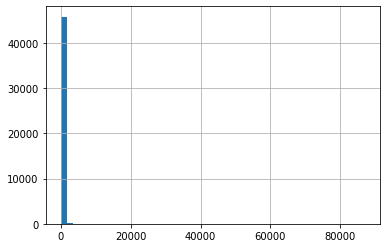

In [30]:
# df.backers.hist(bins='auto')
# https://datascience.stackexchange.com/questions/27116/histogram-plot-with-plt-hist

df.backers.hist(bins=50)

In [31]:
df.backers.describe()

count    45957.000000
mean        69.973192
std        688.628479
min          0.000000
25%          5.000000
50%         23.000000
75%         59.000000
max      87142.000000
Name: backers, dtype: float64

In [32]:
df.backers.sort_values()

29706        0
44903        0
28995        0
20904        0
5799         0
         ...  
17468    24883
11231    36276
42674    61290
10710    68929
41151    87142
Name: backers, Length: 45957, dtype: int64

# Skew of the distribution

In [33]:
import numpy as np
from scipy.stats import kurtosis
from scipy.stats import skew

# x = np.linspace( -5, 5, 1000 )
# y = 1./(np.sqrt(2.*np.pi)) * np.exp( -.5*(x)**2  )  # normal distribution

# print( 'excess kurtosis of normal distribution (should be 0): {}'.format( kurtosis(y) ))
print( 'skewness of normal distribution (should be 0): {}'.format( skew(df.backers) ))

# https://stackoverflow.com/questions/45483890/how-to-correctly-use-scipys-skew-and-kurtosis-functions

skewness of normal distribution (should be 0): 87.47111920387329


In [36]:
df['backers'].skew()

87.47397431084505

In [38]:
#kutosis
df['backers'].kurt()

9341.242538181974

In [43]:
import matplotlib.pyplot as plt
import scipy.stats as stats

#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['backers'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 

fit

array([0.00057635, 0.00057635, 0.00057635, ..., 0.        , 0.        ,
       0.        ])

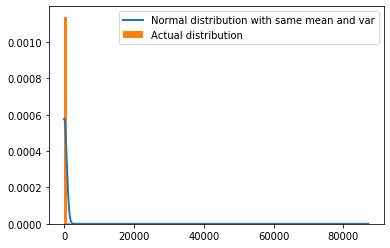

In [45]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df['backers'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show() 

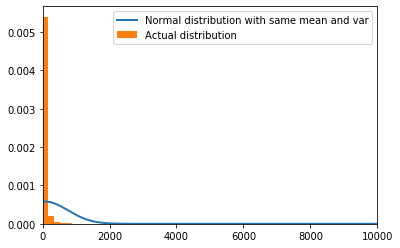

In [55]:


plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h, density=True, bins=500, label="Actual distribution")   
plt.xlim(0, 10000)     # set the xlim to left, right
plt.legend()
plt.show() 


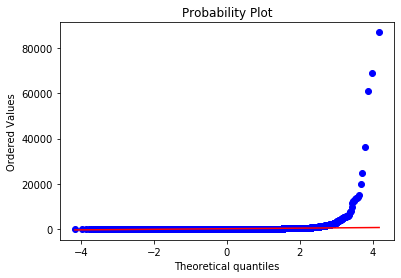

In [56]:
import numpy as np 
import pylab 
import scipy.stats as stats

measurements = df.backers  
stats.probplot(measurements, dist="norm", plot=pylab)
pylab.show()

In [59]:
import scipy

# scipy.stats.shapiro(dat)
# (0.9810476899147034, 1.3054057490080595e-05)scipy.stats.kstest(data, 'norm', args=(data_avg, data_sig))
# # https://stats.stackexchange.com/questions/299012/inconsistent-normality-tests-kolmogorov-smirnov-vs-shapiro-wilk

scipy.stats.shapiro(df.backers)

# stats.probplot(dat, dist=dist)

(0.034664154052734375, 0.0)

In [61]:

# Anderson-Darling Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

data = df.backers
# normality test
result = anderson(data)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 14408.944
15.000: 0.576, data does not look normal (reject H0)
10.000: 0.656, data does not look normal (reject H0)
5.000: 0.787, data does not look normal (reject H0)
2.500: 0.918, data does not look normal (reject H0)
1.000: 1.092, data does not look normal (reject H0)


In [34]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [49]:
import plotly.express as px
tips = px.data.tips()
fig = px.histogram(df, x="backers")

import plotly.plotly as py
px.plot(h, fit, '-', linewidth = 2, label="Normal distribution with same mean and var")

fig.show()

AttributeError: module 'plotly.express' has no attribute 'plot'

In [20]:
df.columns

Index(['project id', 'name', 'url', 'category', 'subcategory', 'location',
       'status', 'goal', 'pledged', 'funded percentage', 'backers',
       'funded date', 'levels', 'reward levels', 'updates', 'comments',
       'duration'],
      dtype='object')

In [21]:
df.location


0           Columbia, MO
1          Maplewood, NJ
2        Los Angeles, CA
3        Los Angeles, CA
4               Novi, MI
              ...       
45952         Austin, TX
45953    Los Angeles, CA
45954    Los Angeles, CA
45955     Vero Beach, FL
45956        Bozeman, MT
Name: location, Length: 45957, dtype: object